In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

### Car Efficiency ###
Cars generate greenhouse gasses in a [variety](http://carboncounter.com) of ways, but fuel burning is the largest.  The fuel efficiency of a car - the amount of fuel it burns per mile driven - is therefore an important factor in its carbon footprint.  Higher fuel efficiency also saves drivers money.  It seems reasonable to posit a *causal effect* of fuel efficiency on the price of a car: if we make a car more fuel-efficient, drivers will be willing to pay higher prices for it, so manufacturers will charge higher prices.

Let us see whether the data match this story.

The table `hybrid` contains data on hybrid passenger cars sold in the United States from 1997 to 2013. The data were adapted from the online data archive of [Prof. Larry Winner](http://www.stat.ufl.edu/%7Ewinner/) of the University of Florida. The columns:

- `vehicle`: model of the car
- `year`: year of manufacture
- `msrp`: manufacturer's suggested retail price in 2013 dollars
- `acceleration`: acceleration rate in km per hour per second
- `mpg`: fuel economy in miles per gallon
- `class`: the model's class.

In [11]:
hybrid = Table.read_table('hybrid.csv')
hybrid.set_format("msrp", CurrencyFormatter)
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,"$24,509.74",7.46,41.26,Compact
Tino,2000,"$35,354.97",8.2,54.1,Compact
Prius (2nd Gen),2000,"$26,832.25",7.97,45.23,Compact
Insight,2000,"$18,936.41",9.52,53,Two Seater
Civic (1st Gen),2001,"$25,833.38",7.04,47.04,Compact
Insight,2001,"$19,036.71",9.52,53,Two Seater
Insight,2002,"$19,137.01",9.71,53,Two Seater
Alphard,2003,"$38,084.77",8.33,40.46,Minivan
Insight,2003,"$19,137.01",9.52,53,Two Seater
Civic,2003,"$14,071.92",8.62,41,Compact


The graph below is a scatter plot.  Each point represents a single car type in the `hybrid` table, like the 2000 Tino.  (That car's point is highlighted for clarity.)  The car's fuel efficiency, in miles per gallon, is plotted on the horizontal (x) axis.  Its price is plotted on the vertical (y) axis.  Find the 2000 Tino in the table and verify that it's plotted at the place you expect.

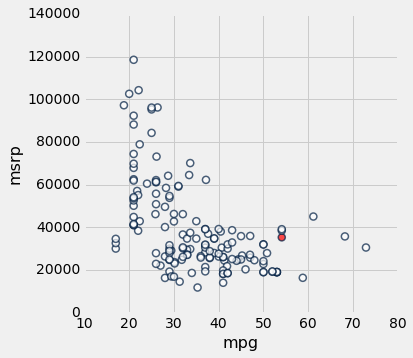

In [35]:
def color(vehicle):
    if vehicle == "Tino":
        return "red"
    else:
        return "white"
hybrid.scatter('mpg', 'msrp', c=hybrid.apply(color, 'vehicle'), s=50, lw=1.5)

The scatter plot allows us to examine the association between fuel efficiency and price.  At the left side, `mpg` (fuel efficiency) is lower, and `msrp` (price) is generally higher.  At the right side, the opposite is true; most of the prices are lower.  For example, the Tino has high fuel efficiency, but its price is relatively low.  It appears that higher fuel efficiency is associated with *lower* prices!

Should we conclude from this that our causal story is backward, and that drivers in fact prefer lower fuel efficiency?  No!  We have found the opposite of the *association* we expected, but that is only weak evidence against the causal story.  Let us see why.

The following graph is another scatter plot.  Each point still represents one car, but now the horizontal axis shows how quickly the car accelerates.  We have highlighted the 2000 Tino again for clarity.

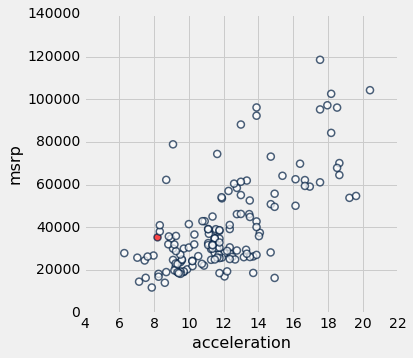

In [38]:
hybrid.scatter('acceleration', 'msrp', c=hybrid.apply(color, 'vehicle'), s=50, lw=1.5)

In this plot, we see that higher acceleration is associated with higher prices.  The Tino is again a useful example: it's one of the slower cars, and its price is also relatively low.

Using this information, can you tell a causal story that's compatible with our earlier one?

How about this:

1. Drivers are willing to pay a bit more for high fuel efficiency.
2. Drivers are willing to pay a *lot* more for high acceleration.
3. Giving a car higher fuel efficiency generally hurts its acceleration.

In this story, drivers like the fuel efficiency of more fuel-efficient cars, but they're turned off by their slower acceleration.

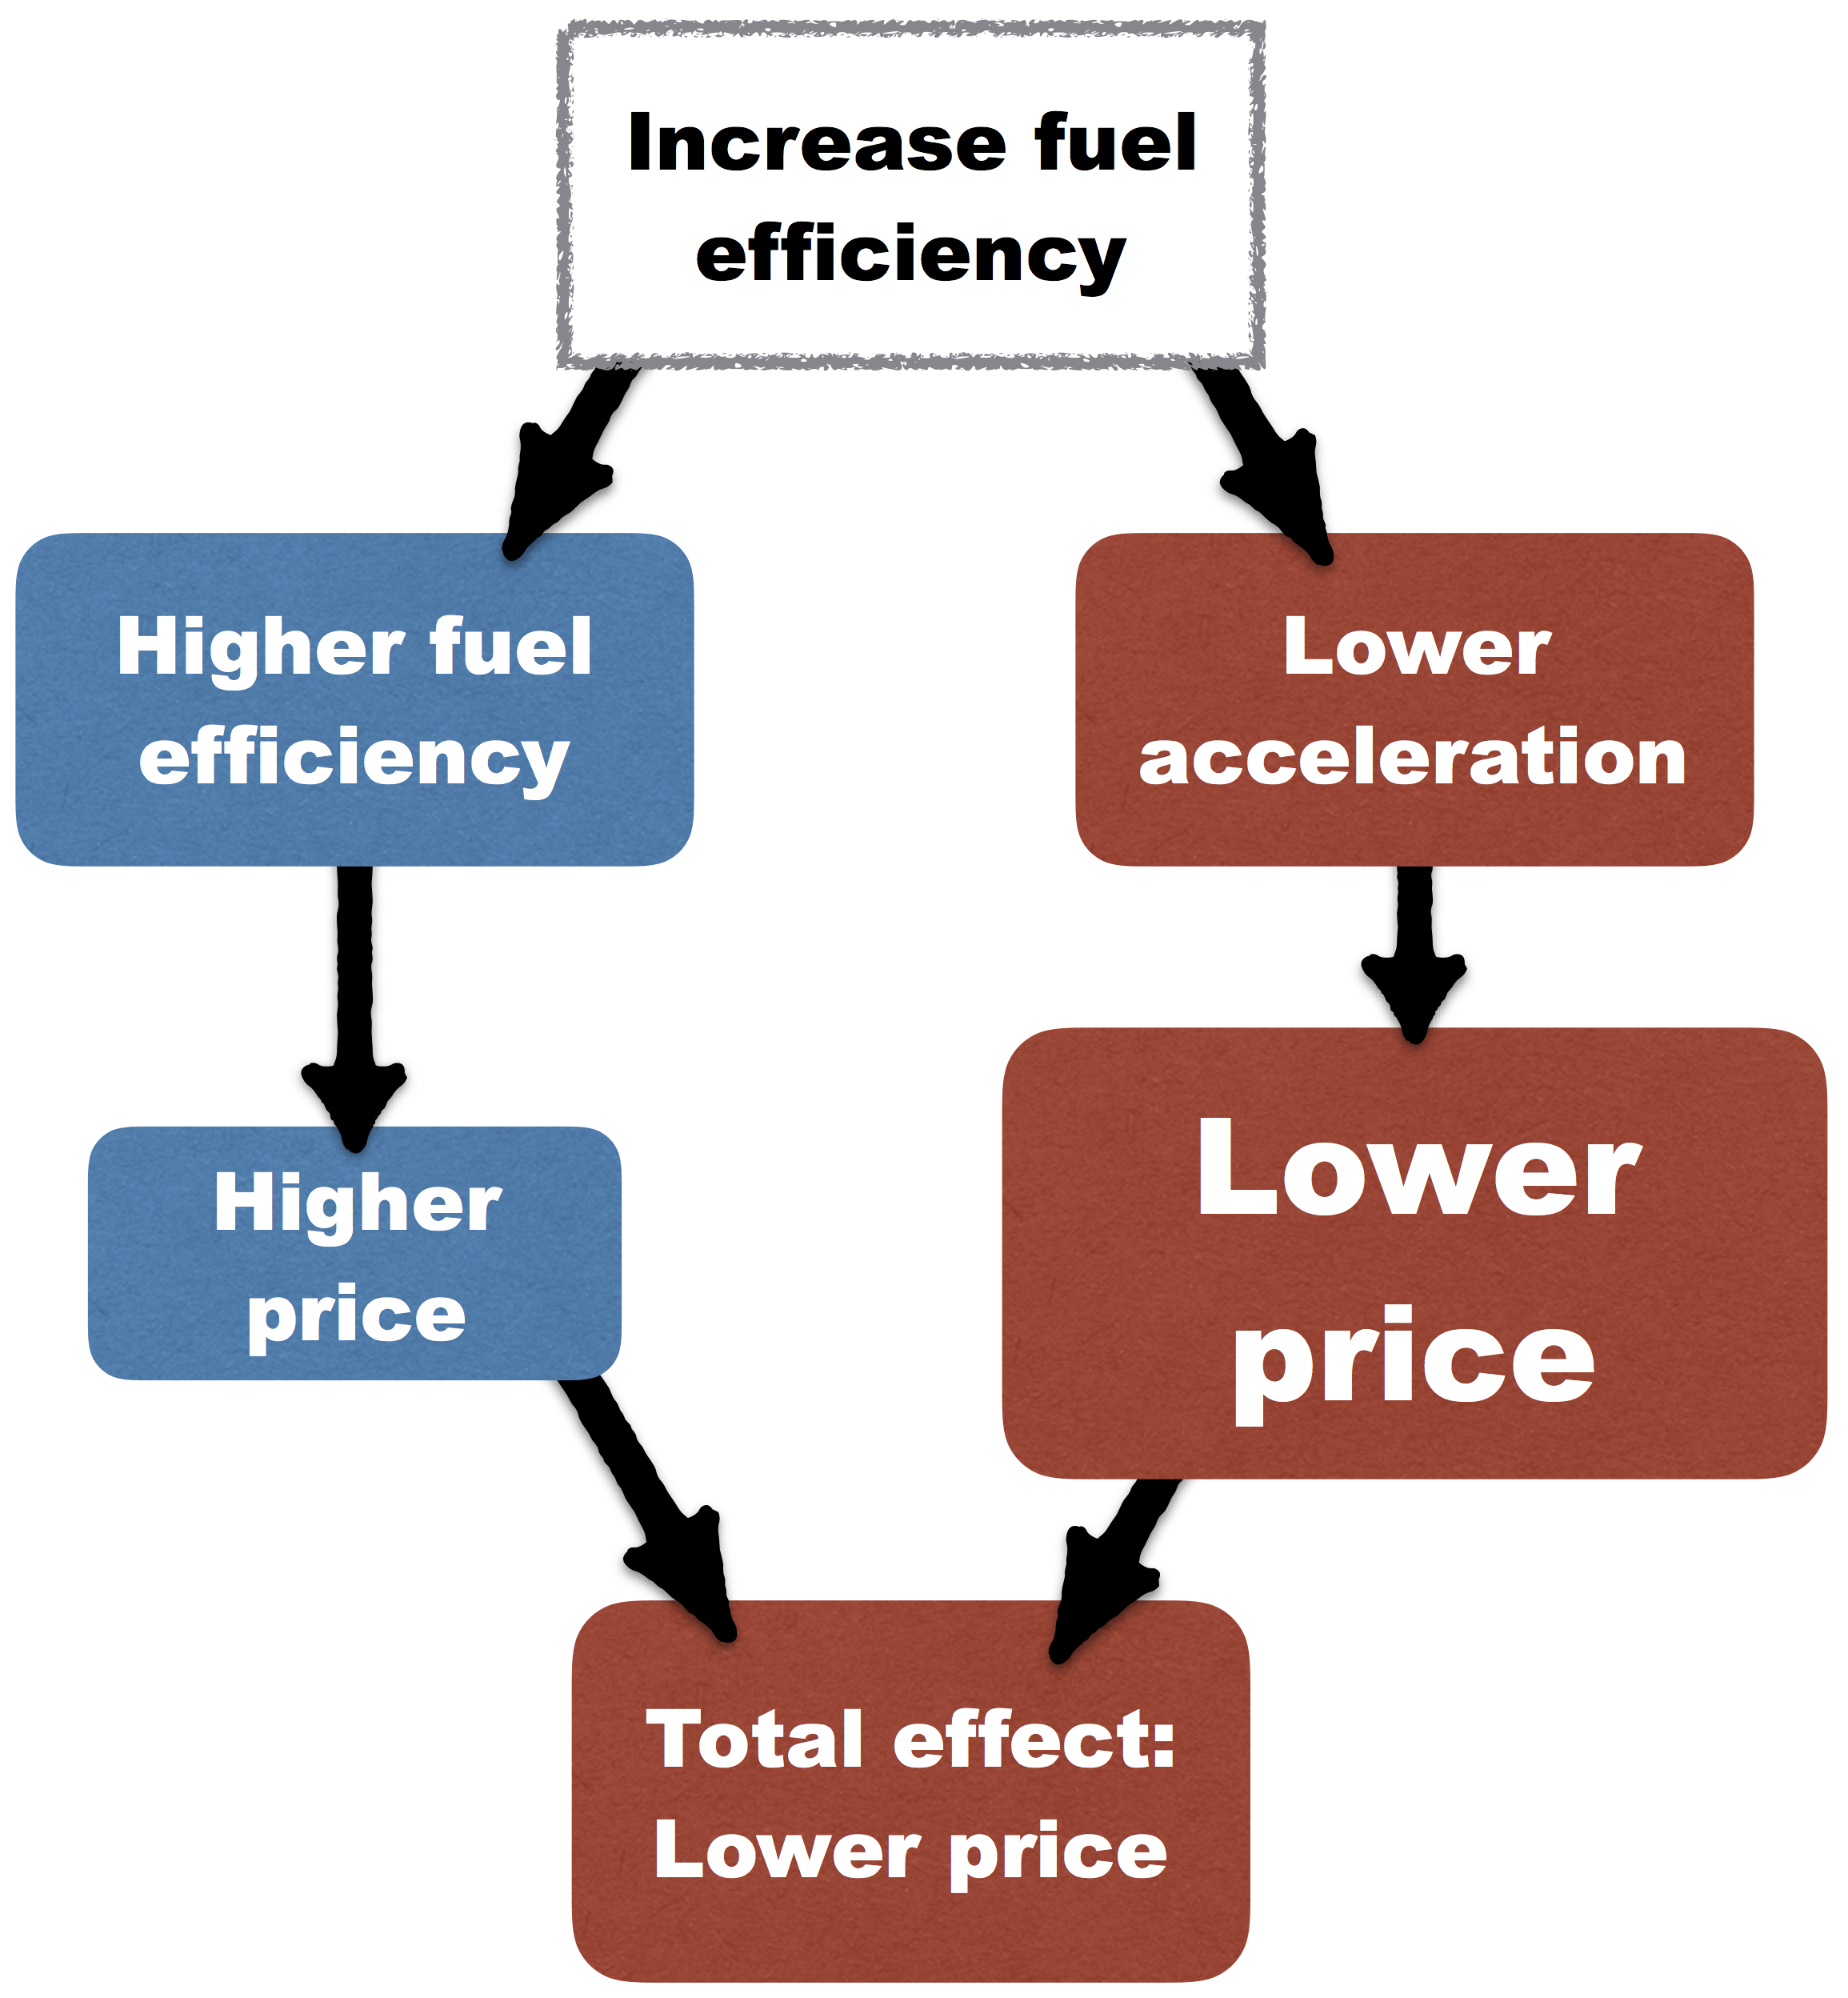

In [42]:
# HIDDEN

from IPython.display import Image
Image("../images/confounding.png")

Let us make one last scatter plot to check whether the data are compatible with part 3 of our story.

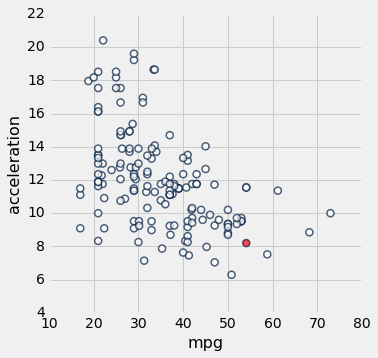

In [40]:
hybrid.scatter('mpg', 'acceleration', c=hybrid.apply(color, 'vehicle'), s=50, lw=1.5)

We see that higher fuel efficiency is indeed associated with lower acceleration.  Maybe our story is true.

In this kind of analysis, we call acceleration a *confounding factor* in the relationship between fuel efficiency and price, because it "confounds" our attempt to study the causal relationship through observed associations.  It seems that it has created an *association* between fuel efficiency and price that is the opposite of the *causal* relationship between them.

### A warning
We should consider whether we might *still* be wrong.  We have looked at just one confounding factor: acceleration.  Perhaps there is another - or hundreds - causally connected to price and fuel efficiency.

If we could examine and untangle the whole web of factors involved in car pricing, then we would be justified in making a firm conclusion about causality.  But that would be an arduous task.  In general, *association is not causation*.

The web site [Spurious Correlations](http://tylervigen.com/spurious-correlations) by Tyler Vigen catalogues thousands of assocations that are clearly not based on direct causal relationships.  One such association is between doctoral degrees awarded in Sociology departments in the US, and deaths caused by anticoagulant drugs.

![Assocation between Sociology doctorates and anticoagulant deaths](http://tylervigen.com/correlation_project/correlation_images/sociology-doctorates-awarded-us_deaths-caused-by-anticoagulants.png)

One of the authors of this text was prescribed anticoagulants after a broken leg.  Would we have reduced our risk of death by petitioning Sociology departments to suspend degree awards until the course of medication was completed?  You decide.